# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [3]:
!pip install helper
import torch
from collections import OrderedDict
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

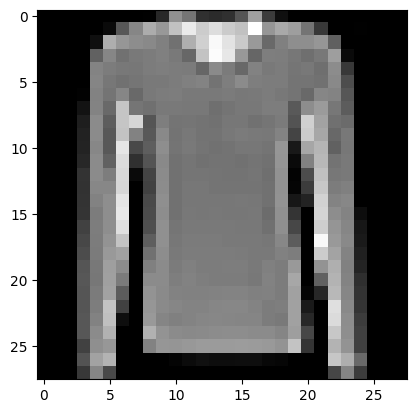

In [4]:
image, label = next(iter(trainloader))
plt.imshow(image[0, :].numpy().squeeze(), cmap='gray')
plt.show()

With the data loaded, it's time to import the necessary packages.

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [6]:
from collections import OrderedDict
input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10

model = nn.Sequential (OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[2], output_size))
                      ]))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [8]:
# TODO: Train the network here

epochs = 4
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      steps += 1
      images.resize_ (images.size()[0], 784)
      optimizer.zero_grad()
      output = model.forward(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

      if steps % print_every == 0:
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))

            running_loss = 0



Epoch: 1/4...  Loss: 2.2984
Epoch: 1/4...  Loss: 2.2763
Epoch: 1/4...  Loss: 2.2442
Epoch: 1/4...  Loss: 2.1980
Epoch: 1/4...  Loss: 2.1113
Epoch: 1/4...  Loss: 1.9667
Epoch: 1/4...  Loss: 1.8239
Epoch: 1/4...  Loss: 1.7012
Epoch: 1/4...  Loss: 1.5998
Epoch: 1/4...  Loss: 1.4767
Epoch: 1/4...  Loss: 1.3465
Epoch: 1/4...  Loss: 1.2412
Epoch: 1/4...  Loss: 1.1301
Epoch: 1/4...  Loss: 1.0277
Epoch: 1/4...  Loss: 0.9671
Epoch: 1/4...  Loss: 0.9538
Epoch: 1/4...  Loss: 0.8763
Epoch: 1/4...  Loss: 0.8412
Epoch: 1/4...  Loss: 0.7988
Epoch: 1/4...  Loss: 0.7595
Epoch: 1/4...  Loss: 0.7523
Epoch: 1/4...  Loss: 0.7340
Epoch: 1/4...  Loss: 0.7296
Epoch: 2/4...  Loss: 0.3844
Epoch: 2/4...  Loss: 0.7222
Epoch: 2/4...  Loss: 0.6879
Epoch: 2/4...  Loss: 0.6867
Epoch: 2/4...  Loss: 0.6921
Epoch: 2/4...  Loss: 0.6381
Epoch: 2/4...  Loss: 0.6749
Epoch: 2/4...  Loss: 0.6468
Epoch: 2/4...  Loss: 0.6420
Epoch: 2/4...  Loss: 0.6392
Epoch: 2/4...  Loss: 0.6487
Epoch: 2/4...  Loss: 0.6625
Epoch: 2/4...  Loss:

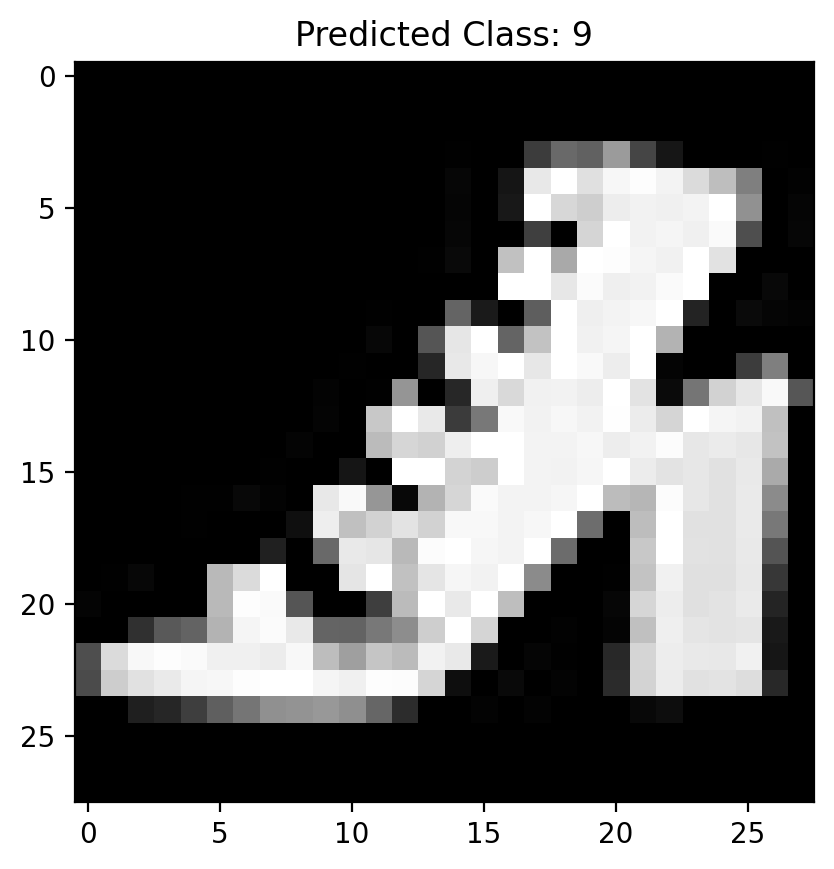

In [12]:
# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
  logits = model.forward(img)
ps = F.softmax(logits, dim=1)
print(ps)

# Plot the image and probabilities
import matplotlib.pyplot as plt

# Reshape the image to 28x28
image = img.view(28, 28)

# Display the image
plt.imshow(image.numpy(), cmap='gray')
plt.title('Predicted Class: {}'.format(ps.argmax().item()))
plt.show()

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.

In [15]:
fashion_mnist_model = {'input_size': 784,
                       'output_size': 10,
                       'hidden_layers': [each.out_features for each in model.children() if isinstance(each, nn.Linear)],
                       'state_dict': model.state_dict()}


torch.save(fashion_mnist_model, 'fashion_mnist_model.pth')